In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from scipy.sparse.linalg import norm

In [2]:
import sys
sys.path.insert(0, "../scripts")

from SZFW_lasso import *
from DZFW_lasso import *
from IZFW_lasso import *

## Load data

In [3]:
# load data
X, y = datasets.load_svmlight_file("../Data/covtype.libsvm.binary.scale.bz2")

In [4]:
# space dimension
d = X.shape[1]
n = y.shape[0]
print(f"Space Dimensions\nd: {d}")
print(f"n: {y.shape[0]}")

Space Dimensions
d: 54
n: 581012


In [5]:
# define the objective function
F = lambda w: 0.5/n * np.sum(np.power(y - X @ w, 2))

In [6]:
# initialize prarameters for the algorithm (in common for all the algorithms)

# stating point, sparse
np.random.seed(1007)
w0 = np.random.rand(d)
w0 = w0/np.sum(w0) * np.random.rand(1)

indeces = np.random.randint(low = 0, high = d-1, size = 20)
w0[indeces] = int(0)
print(f"w0: {w0}")

L: 3

w0: [0.01427508 0.         0.00015906 0.         0.01389659 0.00688839
 0.         0.         0.01932185 0.01479194 0.02022282 0.00448395
 0.00748594 0.01342289 0.01271894 0.02491499 0.02041378 0.00027417
 0.00842006 0.00915197 0.02134084 0.01812206 0.         0.00217311
 0.02532913 0.         0.01866816 0.         0.         0.00976202
 0.         0.         0.         0.         0.0048263  0.00815502
 0.         0.00240203 0.01385256 0.0026268  0.02195627 0.02554037
 0.         0.         0.00559095 0.02190458 0.01865861 0.
 0.01393978 0.         0.00446371 0.00612003 0.0110981  0.021799  ]


## Deterministic Gradient Free Frank Wolfe

In [7]:
%%time

# Lipschitz constant 
L = 3

fpred, f, w, mean, t, loss, f_values = detZFW(F, L, d, w0, T=100)

Loss evaluation at time 1:	0.6434678

Loss evaluation at time 2:	0.1126711

Loss evaluation at time 3:	0.0396705

Loss evaluation at time 4:	0.0186785

Loss evaluation at time 5:	0.0103272

Loss evaluation at time 6:	0.0063267

Loss evaluation at time 7:	0.0041631

Loss evaluation at time 8:	0.0028882

Loss evaluation at time 9:	0.0020870

Loss evaluation at time 10:	0.0015578

Loss evaluation at time 11:	0.0011940

Loss evaluation at time 12:	0.0009355

Loss evaluation at time 13:	0.0007467

Loss evaluation at time 14:	0.0006056

Loss evaluation at time 15:	0.0004980

Loss evaluation at time 16:	0.0004145

Loss evaluation at time 17:	0.0003487

Loss evaluation at time 18:	0.0002961

Loss evaluation at time 19:	0.0002536

Loss evaluation at time 20:	0.0002189

Loss evaluation at time 21:	0.0001902

Loss evaluation at time 22:	0.0001664

Loss evaluation at time 23:	0.0001464

Loss evaluation at time 24:	0.0001294

Loss evaluation at time 25:	0.0001150

Loss evaluation at time 26:	0.0001

In [9]:
print(f'OUTPUT:\n\nF(w0) = {F(w0)}\n\nF(w_pred) = {fpred}\n\nF(w) = {f}\n\nw = {w}\n\naverage w = {mean}\n\nT = {t}')

OUTPUT:

F(w0) = 1.1586989989974017

F(w_pred) = 0.30946125867317376

F(w) = 0.30945146089466885

w = [8.06501705e-06 0.00000000e+00 8.98646933e-08 0.00000000e+00
 7.85118183e-06 3.89174810e-06 0.00000000e+00 9.99435028e-01
 1.09162988e-05 8.35702561e-06 1.14253214e-05 2.53330594e-06
 4.22934586e-06 7.58355126e-06 7.18584115e-06 1.40762660e-05
 1.15332112e-05 1.54897320e-07 4.75709568e-06 5.17060659e-06
 1.20569735e-05 1.02384500e-05 0.00000000e+00 1.22774416e-06
 1.43102433e-05 0.00000000e+00 1.05469819e-05 0.00000000e+00
 0.00000000e+00 5.51526653e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.72672452e-06 4.60735805e-06
 0.00000000e+00 1.35707673e-06 7.82630471e-06 1.48406801e-06
 1.24046722e-05 1.44295881e-05 0.00000000e+00 0.00000000e+00
 3.15873095e-06 1.23754668e-05 1.05415862e-05 0.00000000e+00
 7.87558191e-06 0.00000000e+00 2.52187150e-06 3.45764426e-06
 6.27011077e-06 1.23158219e-05]

average w = [1.37992442e-04 0.00000000e+00 1.53758490e-06 0.00000000e+00

In [10]:
lossd = np.load("../Data/results/loss_dZFW_lasso.npy") # data from colab (NOT NORMALIZED)
f_d = np.load("../Data/results/function_dZFW_lasso.npy")
f_d = f_d/n
f_star = np.min(f_d)

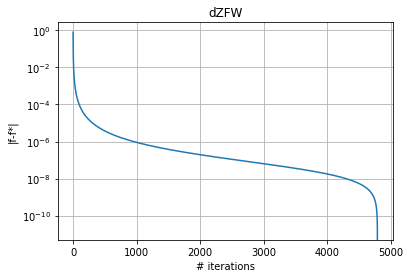

In [11]:
F_eval = np.abs(f_d - f_star)
plt.plot(F_eval)
plt.yscale("log")
plt.title("dZFW")
plt.xlabel("# iterations")
plt.ylabel("|f-f*|")
plt.grid()

## Stochastic Gradient Free Frank Wolfe

In [12]:
%%time
fpred, f, w, mean, t, loss, f_values = stochasticZFW(F, d, w0, method = "IRDSA", r=1, T=100, eps=1e-5)

Loss evaluation at time 1:	0.0109030

Loss evaluation at time 2:	0.0166389

Loss evaluation at time 3:	0.2074434

Loss evaluation at time 4:	0.0721850

Loss evaluation at time 5:	0.0312891

Loss evaluation at time 6:	0.0997247

Loss evaluation at time 7:	0.0255838

Loss evaluation at time 8:	0.0472122

Loss evaluation at time 9:	0.0643322

Loss evaluation at time 10:	0.0509400

Loss evaluation at time 11:	0.0455933

Loss evaluation at time 12:	0.0027826

Loss evaluation at time 13:	0.0359570

Loss evaluation at time 14:	0.0262340

Loss evaluation at time 15:	0.0256478

Loss evaluation at time 16:	0.0185212

Loss evaluation at time 17:	0.0158879

Loss evaluation at time 18:	0.0137342

Loss evaluation at time 19:	0.0148630

Loss evaluation at time 20:	0.0129855

Loss evaluation at time 21:	0.0088704

Loss evaluation at time 22:	0.0103234

Loss evaluation at time 23:	0.0091657

Loss evaluation at time 24:	0.0059770

Loss evaluation at time 25:	0.0053577

Loss evaluation at time 26:	0.0048

In [13]:
print(f'OUTPUT:\n\nF(w0) = {f}\n\nF(w_pred) = {fpred}\n\nF(w) = {f}\n\nw = {w}\n\naverage w = {mean}\n\nT = {t}')

OUTPUT:

F(w0) = 0.3305297578114198

F(w_pred) = 0.33038951584565174

F(w) = 0.3305297578114198

w = [ 4.39593324e-03  2.07684320e-03  7.70802042e-07  0.00000000e+00
  6.73424319e-05  3.33809339e-05  5.13326411e-01  4.66597439e-01
  9.36330510e-05  7.16812373e-05  3.38633419e-03  2.17290831e-05
  3.62766322e-05  6.50468675e-05  6.16355638e-05  1.20737235e-04
  9.89245322e-05  1.32861045e-06  4.08033337e-05  4.43501666e-05
  1.03417032e-04  8.78188960e-05  0.00000000e+00  2.60658480e-03
  1.22744143e-04  0.00000000e+00  9.04652863e-05  0.00000000e+00
  0.00000000e+00  4.73064398e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.33881044e-05  3.95189798e-05
  1.38456213e-03  1.16401389e-05  6.71290519e-05  1.27293892e-05
 -1.45123303e-03  1.23767806e-04  0.00000000e+00  0.00000000e+00
  2.70935801e-05  1.06148863e-04  9.04190052e-05  0.00000000e+00
  6.75517202e-05  0.00000000e+00  2.16310058e-05  2.96574679e-05
  5.37810124e-05  1.05637268e-04]

average w = [ 3.629

In [14]:
loss_stochm6 = np.load("../Data/results/loss_SZFWm6_lasso.npy") # data from colab (NOT NORMALIZED)
f_stochm6 = np.load("../Data/results/function_SZFWm6_lasso.npy")
f_stochm6 = f_stochm6/n

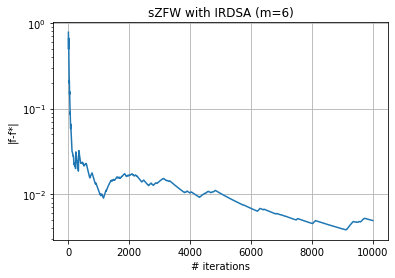

In [15]:
F_eval = np.abs(f_stochm6 - f_star)
plt.plot(F_eval)
plt.yscale("log")
plt.title("sZFW with IRDSA (m=6)")
plt.xlabel("# iterations")
plt.ylabel("|f-f*|")
plt.grid()

In [16]:
loss_stochm1 = np.load("../Data/results/loss_SZFWm1_lasso.npy") # data from colab (NOT NORMALIZED)
f_stochm1 = np.load("../Data/results/function_SZFWm1_lasso.npy")
f_stochm1 = f_stochm1/n

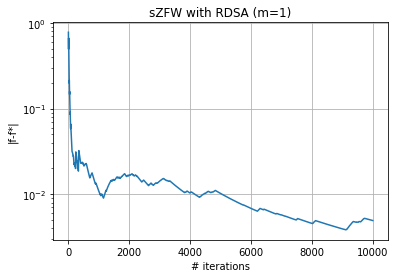

In [17]:
F_eval = np.abs(f_stochm6 - f_star)
plt.plot(F_eval)
plt.yscale("log")
plt.title("sZFW with RDSA (m=1)")
plt.xlabel("# iterations")
plt.ylabel("|f-f*|")
plt.grid()

## Zeroth order stochastic accelerated gradient method with Inexact updates

In [26]:
%%time 

# setting parameters
L = 0.1
D = 10000 # we will start from m = 6, up to T * (T+1) / D * (d+3) = 28785 (for T=100)
B = 1

fpred, f, w, mean, t, loss, f_values = IZFW(F, d, w0, L, B, r = 1, T = 10, eps = 1e-3)

Loss evaluation at time 1:	0.5551388

Loss evaluation at time 2:	0.1594307

Loss evaluation at time 3:	0.0591694

Loss evaluation at time 4:	0.0254504

Loss evaluation at time 5:	0.0151612

Loss evaluation at time 6:	0.0091598

Loss evaluation at time 7:	0.0059715

Loss evaluation at time 8:	0.0041158

Loss evaluation at time 9:	0.0029601

Loss evaluation at time 10:	0.0000698

CPU times: user 10min 14s, sys: 2min 3s, total: 12min 17s
Wall time: 6min 19s


In [27]:
print(f'OUTPUT:\n\nF(w_pred) = {fpred}\n\nF(w) = {f}\n\nw = {w}\n\naverage w = {mean}\n\nT = {t}')

OUTPUT:

F(w_pred) = 0.32214128882503373

F(w) = 0.3222110957810947

w = [2.16289094e-04 0.00000000e+00 2.41000768e-06 0.00000000e+00
 2.10554422e-04 1.04369608e-04 1.26046176e-01 8.48701299e-01
 2.92755286e-04 2.24120232e-04 1.04074164e-02 6.79386592e-05
 1.13423366e-04 2.03377057e-04 1.92711195e-04 3.77499861e-04
 3.09299755e-04 4.15406449e-06 1.27576657e-04 1.38666268e-04
 3.23346108e-04 2.74576613e-04 0.00000000e+00 3.29258661e-05
 3.83774707e-04 0.00000000e+00 2.82850879e-04 0.00000000e+00
 0.00000000e+00 1.47909421e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.31257940e-05 1.23560966e-04
 0.00000000e+00 3.63943304e-05 2.09887263e-04 3.98000058e-05
 3.32670756e-04 3.86975316e-04 0.00000000e+00 0.00000000e+00
 8.47114209e-05 3.31887518e-04 2.82706175e-04 0.00000000e+00
 2.11208788e-04 0.00000000e+00 6.76320085e-05 9.27277323e-05
 1.68152971e-04 3.30287952e-04]

average w = [1.18959001e-03 0.00000000e+00 1.32550423e-05 0.00000000e+00
 1.15804932e-03 5.74032845e-

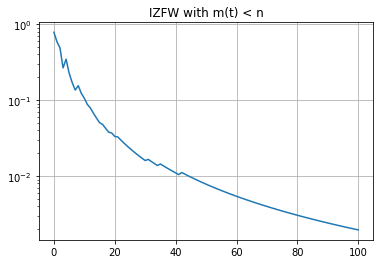

In [28]:
f_inex = np.load('../Data/results/function_IZFW_lasso.npy') # data from cluster
F_eval = np.abs(f_inex/n - f_star)
plt.plot(F_eval)
plt.yscale("log")
plt.title("IZFW with m(t) < n")
plt.grid()

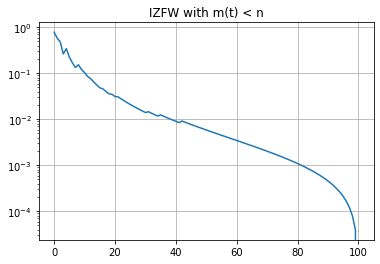

In [29]:
F_eval = np.abs(f_inex/n - np.min(f_inex/n))
plt.plot(F_eval)
plt.yscale("log")
plt.title("IZFW with m(t) < n")
plt.grid()